Epoch 1/100
1s - loss: 0.0322
Epoch 2/100
1s - loss: 0.0147
Epoch 3/100
1s - loss: 0.0116
Epoch 4/100
1s - loss: 0.0106
Epoch 5/100
1s - loss: 0.0097
Epoch 6/100
1s - loss: 0.0089
Epoch 7/100
1s - loss: 0.0083
Epoch 8/100
1s - loss: 0.0074
Epoch 9/100
1s - loss: 0.0066
Epoch 10/100
1s - loss: 0.0058
Epoch 11/100
1s - loss: 0.0052
Epoch 12/100
1s - loss: 0.0045
Epoch 13/100
1s - loss: 0.0040
Epoch 14/100
1s - loss: 0.0034
Epoch 15/100
1s - loss: 0.0031
Epoch 16/100
1s - loss: 0.0028
Epoch 17/100
1s - loss: 0.0026
Epoch 18/100
1s - loss: 0.0024
Epoch 19/100
1s - loss: 0.0023
Epoch 20/100
1s - loss: 0.0022
Epoch 21/100
1s - loss: 0.0021
Epoch 22/100
1s - loss: 0.0021
Epoch 23/100
1s - loss: 0.0021
Epoch 24/100
1s - loss: 0.0021
Epoch 25/100
1s - loss: 0.0020
Epoch 26/100
1s - loss: 0.0021
Epoch 27/100
1s - loss: 0.0020
Epoch 28/100
1s - loss: 0.0021
Epoch 29/100
1s - loss: 0.0020
Epoch 30/100
1s - loss: 0.0020
Epoch 31/100
1s - loss: 0.0021
Epoch 32/100
1s - loss: 0.0020
Epoch 33/100
1s -

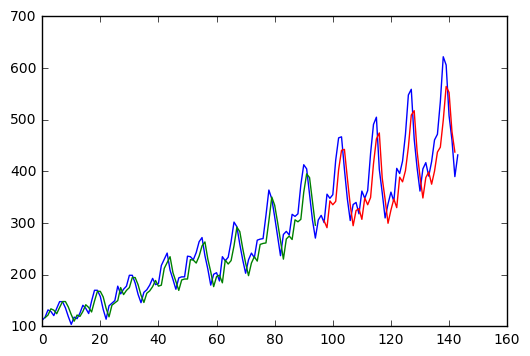

In [2]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('../data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()